In [61]:
using JLD2
using Plots
using StatsBase
using LaTeXStrings

In [62]:
blur(xs, step) = mean([xs[i:step:end] for i in 1:step])

blur (generic function with 1 method)

In [63]:
data = jldopen("../output/collated_results.jld2")["results"]

Dict{NTuple{5, Any}, Tuple{Dict{Symbol, Vector{Float64}}, Dict{Symbol, Vector{Float64}}, Int64, Vector{Symbol}, Float64}} with 66 entries:
  (24, 50, 0.8, 0.7, 0.1) => (Dict(:κEA=>[24.0, 24.0, 24.0, 1.02145, 1.09126, 1…
  (2, 6, 1.0, 0.7, 0.1)   => (Dict(:κEA=>[2.0, 2.0, 2.0, 1.00003, 1.00003, 1.0,…
  (16, 34, 0.7, 0.7, 0.1) => (Dict(:κEA=>[16.0, 16.0, 16.0, 1.05003, 1.3426, 1.…
  (16, 34, 0.5, 0.7, 0.1) => (Dict(:κEA=>[16.0, 16.0, 16.0, 1.35099, 3.52221, 1…
  (2, 6, 0.2, 0.7, 0.1)   => (Dict(:κEA=>[2.0, 2.0, 2.0, 1.1226, 1.84937, 1.121…
  (2, 6, 0.7, 0.7, 0.1)   => (Dict(:κEA=>[2.0, 2.0, 2.0, 1.00334, 1.11787, 1.00…
  (16, 34, 0.3, 0.7, 0.1) => (Dict(:κEA=>[16.0, 16.0, 16.0, 2.24215, 7.96119, 1…
  (24, 50, 0.0, 0.7, 0.1) => (Dict(:κEA=>[24.0, 24.0, 24.0, 4.85876, 19.979, 4.…
  (2, 6, 0.5, 0.7, 0.1)   => (Dict(:κEA=>[2.0, 2.0, 2.0, 1.0234, 1.00894, 1.000…
  (32, 66, 0.1, 0.7, 0.1) => (Dict(:κEA=>[32.0, 32.0, 32.0, 5.80875, 23.8895, 4…
  (32, 66, 1.0, 0.7, 0.1) => (Dict(:κEA=>[32.0, 32.

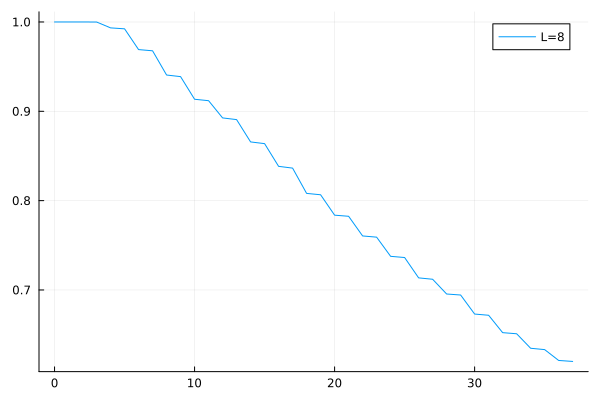

In [96]:
λ = 0.0
δ = 0.7
q = 0.1

plt = plot()

for L in [8]
    xs = collect(0:4L+5)
    ys = data[(L,2L+2,λ,δ,q)][2][:Ic]
    plot!(plt, xs, ys, label="L=$L")
end
plt

L=8, samples=1000
L=16, samples=1000
L=24, samples=1000
L=32, samples=1000
L=40, samples=1000


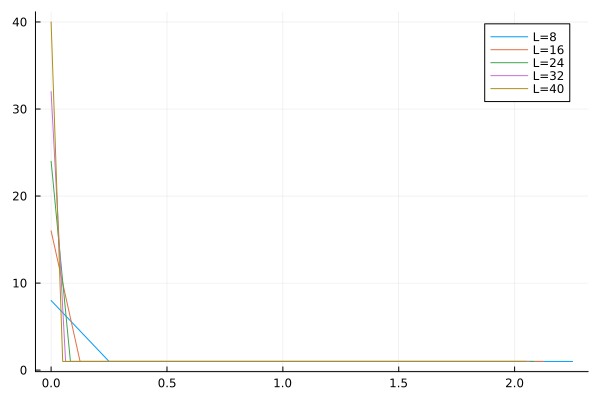

In [89]:
λ = 1.0
δ = 0.7
q = 0.1

plt = plot()

for L in 8:8:40
    xs = collect(0:2L+2)
    ys = blur(data[(L,2L+2,λ,δ,q)][1][:κEA], 2)
    println("L=$L, samples=$(data[(L,2L+2,λ,δ,q)][3])")
    plot!(plt, xs/L, ys, label="L=$L")
end
plt

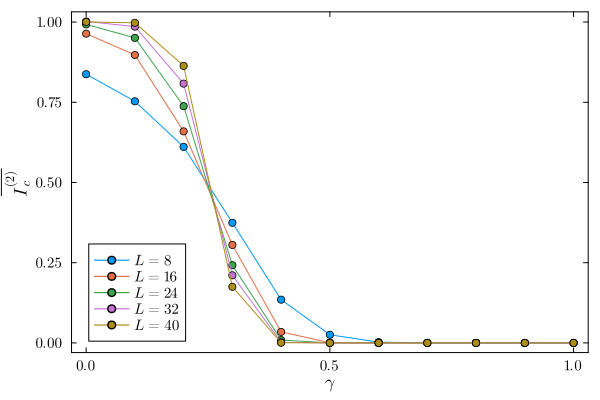

In [97]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    λs = 0.0:0.1:1.0
    ys = [blur(data[(L,2L+2,λ,δ,q)][2][:Ic],2)[end÷2] for λ in λs]
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\gamma", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, legend=:bottomleft,
    grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
p1 = plt
p1

plot(p1)

# plot!(p1,inset=bbox(0.6,0.08,0.35,0.35), subplot=2, )

# ν = 1.5
# Δc = 0.27
# for L in 4:4:12
#     Δs = 0.0:0.1:1.0
#     xs = (Δs .- Δc) * L^(1/ν)
#     ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:Ic],2)[end] for Δ in Δs]
# #     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
#     xticks = (0.0:2.5:7.5, [L"0.0", L"2.5", L"5.0", L"7.5"])
#     yticks = (0.0:0.25:0.75, [L"0.00", L"0.25", L"0.50", L"0.75"])#, L"1.00"])
#     plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{12}}(\Delta-\Delta_{c,12})", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
#     framestyle=:box, xticks=xticks, yticks=yticks,
#     subplot=2, grid=false, legend=false,
#     xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
# end
# # # annotate!(11.5, 0.9, text(L"(\nu_2=1.0)", 10, :center), subplot=2)
# # savefig("/Users/jhauser/Documents/Z2 paper figs/updated/Ic_2.pdf")
# p1

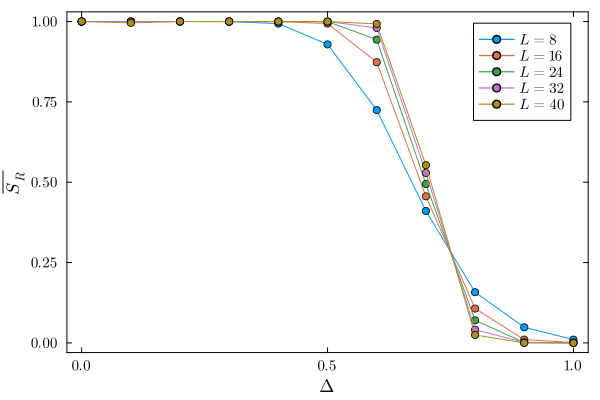

In [98]:
q = 0.1
δ = 0.7
plt = plot()
for L in 8:8:40
    λs = 0.0:0.1:1.0
    ys = [blur(data[(L,2L+2,λ,δ,q)][2][:SR],2)[end÷2] for λ in λs]
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{S_R}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, legend=:topright,
    grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
p1 = plt
p1

plot(p1)

# plot!(p1,inset=bbox(0.22,0.4,0.35,0.35), subplot=2, )

# ν = 2.
# Δc = 0.7
# for L in 4:4:12
#     Δs = 0.0:0.1:1.0
#     xs = (Δs .- Δc) * L^(1/ν)
#     ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:SR],2)[end] for Δ in Δs]
# #     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
#     xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
#     yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
#     plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\Delta-\Delta_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
#     framestyle=:box, xticks=xticks, yticks=yticks,
#     subplot=2, grid=false, legend=false,
#     xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
# end
# # # annotate!(11.5, 0.9, text(L"(\nu_2=1.0)", 10, :center), subplot=2)
# # savefig("/Users/jhauser/Documents/Z2 paper figs/updated/SR.pdf")
# p1

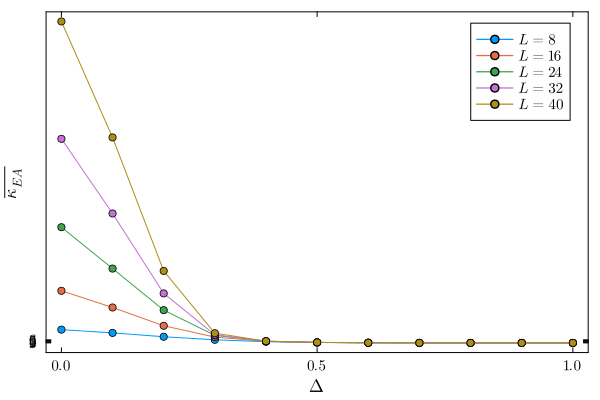

In [99]:

q = 0.1
plt = plot()
for L in 8:8:40
    λs = 0.0:0.1:1.0
    ys = [blur(data[(L,2L+2,λ,δ,q)][2][:κEA],2)[end÷2] for λ in λs]
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (1:1:6, [L"1", L"2", L"3", L"4", L"5", L"6"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

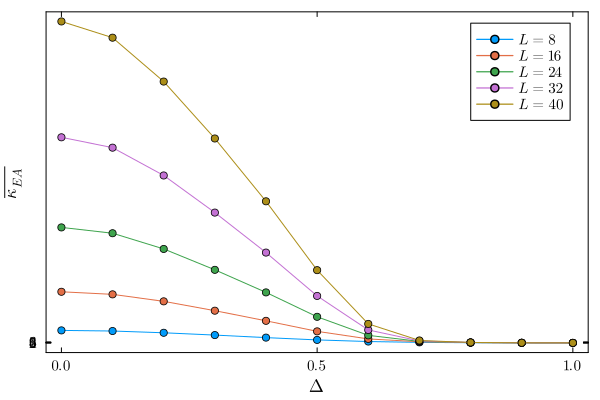

In [100]:

q = 0.1
plt = plot()
for L in 8:8:40
    λs = 0.0:0.1:1.0
    ys = [blur(data[(L,2L+2,λ,δ,q)][2][:κ2],2)[end÷2] for λ in λs]
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (1:1:6, [L"1", L"2", L"3", L"4", L"5", L"6"])
    plot!(plt, λs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
# savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt

In [10]:
data["results"][(40,82,0.5,0.7,0.1)][5]

486.3746769428253

In [25]:
max([data["results"][(8,18,λ,0.7,0.1)][5] for λ in 0.0:0.1:1.0]...)

15.262562990188599

In [24]:
max([data["results"][(16,34,λ,0.7,0.1)][5] for λ in 0.0:0.1:1.0]...)

210.21856307983398

In [23]:
max([data["results"][(24,50,λ,0.7,0.1)][5] for λ in 0.0:0.1:1.0]...)

139.1495909690857

In [22]:
max([data["results"][(32,66,λ,0.7,0.1)][5] for λ in 0.0:0.1:1.0]...)

270.6199858188629

In [21]:
max([data["results"][(40,82,λ,0.7,0.1)][5] for λ in 0.0:0.1:1.0]...)

486.3746769428253